In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# 线检测

In [2]:
img = cv.imread('./image/rili.jpg', 0)

In [3]:
edges = cv.Canny(img, 50, 150)

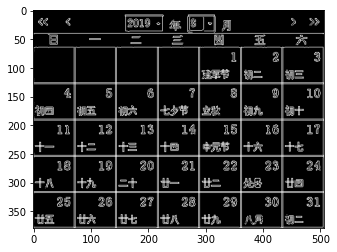

In [4]:
plt.imshow(edges, cmap=plt.cm.gray)

In [6]:
lines = cv.HoughLines(edges, 0.8, np.pi/180, 150)

In [12]:
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = rho * a
    y0 = rho * b
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * a)
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * a)
    cv.line(img, (x1, y1), (x2, y2), (0,255,0))

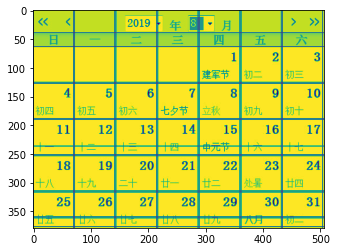

In [14]:
plt.imshow(img)

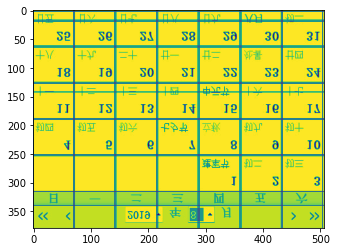

In [17]:
plt.imshow(img[ ::-1])

# 圆检测

In [18]:
star = cv.imread('./image/star.jpeg')

In [19]:
gray_img = cv.cvtColor(star, cv.COLOR_BGR2GRAY)

In [21]:
img = cv.medianBlur(gray_img, 7)

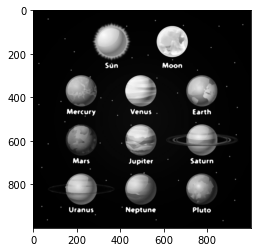

In [22]:
plt.imshow(img, cmap=plt.cm.gray)

In [23]:
circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 1, 200, param1=100, param2=50, minRadius=0, maxRadius=100)

In [24]:
circles

array([[[494.5, 820.5,  71.7],
        [494.5, 596.5,  71.3],
        [221.5, 370.5,  72. ],
        [774.5, 370.5,  72. ],
        [221.5, 596.5,  71.2],
        [773.5, 820.5,  71.6],
        [493.5, 369.5,  70.9],
        [220.5, 820.5,  71.5],
        [774.5, 594.5,  70.6],
        [362.5, 145.5,  64.5],
        [632.5, 138.5,  63.3]]], dtype=float32)

In [37]:
for i in circles[0,:]:
    cv.circle(star,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),5)
    cv.circle(star,(int(i[0]),int(i[1])),2,(0,255,0),-1)

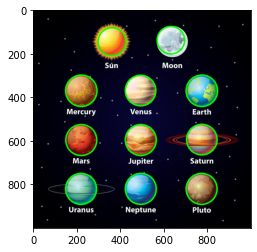

In [38]:
plt.imshow(star[:, :, ::-1])